# Data granularity

Our Airline_Delay_Cause.csv has 130+ airlines, including regional carriers, cargo services, and codeshare duplicates — many of which:

1. don’t serve major hubs

2. have few flights (small arr_flights)

3. add noise to ML and optimization

Focusing on top carriers gives us better coverage, reliability, and interpretability.

We assume starting in the Bay Area & LA (OAK, SFO, SJC, LAX) & ending in the NYC area (Laguardia, JFK, Newark)

The travelers in our model would realistically be comparing:

1. United (UA)
2. Delta (DL)
3. American (AA)
4. Southwest (WN)
5. Alaska (AS)
6. JetBlue (B6)
7. Frontier (F9)

In [ ]:
import pandas as pd

df = pd.read_csv('Airline_Delay_Cause.csv')

top_carriers = ['UA', 'DL', 'AA', 'WN', 'AS', 'B6', 'F9']
df_filtered = df[df['carrier'].isin(top_carriers)]

We also want to cut down airports (Locations): Focus on a Known Route Corridor

Since we're simulating a route like Bay/LA → NYC, only keep airports that:
1. are major hubs along the path
2. could be layover airports
3. include start and end cities (SFO, JFK, LGA, EWR)

We narrow down to these airports with reasonings described
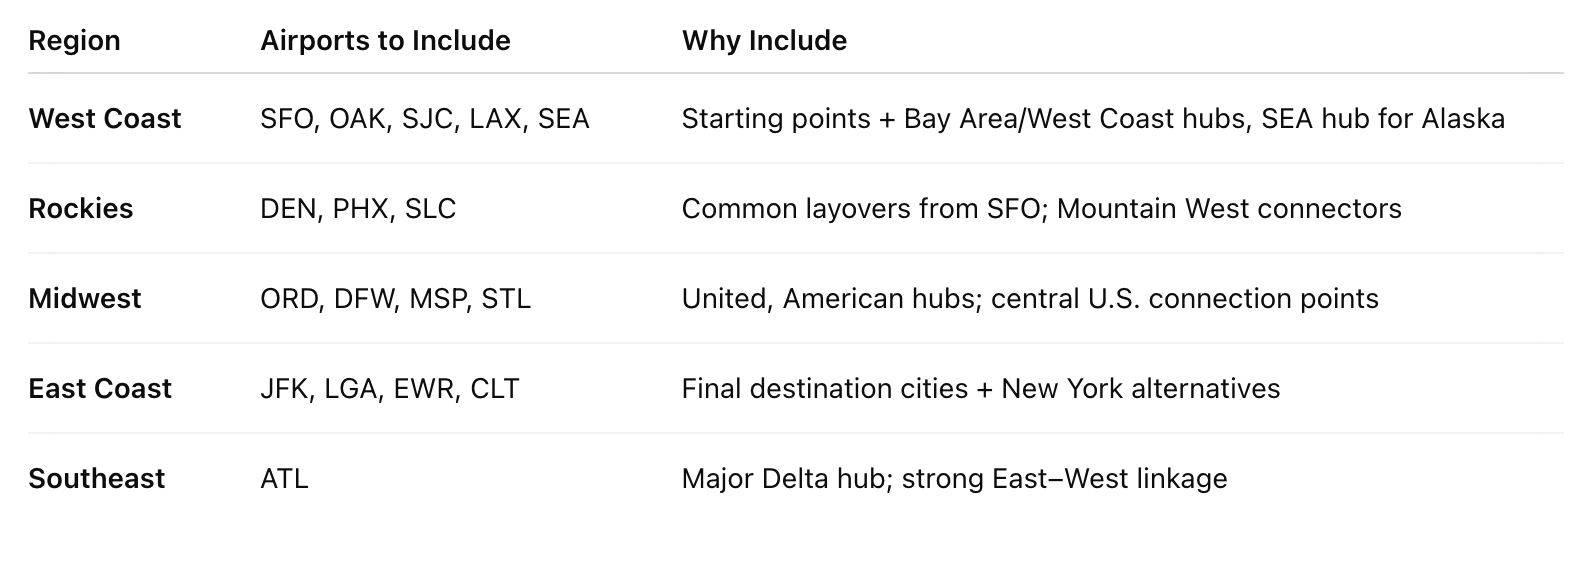


In [ ]:
airports_to_keep = ['SFO', 'OAK', 'SJC', 'LAX', 'DEN', 'PHX', 'SLC',
                    'ORD', 'DFW', 'MSP', 'STL', 'JFK', 'LGA', 'EWR', 'CLT', 'SEA', 'ATL']

df = df_filtered[df_filtered['airport'].isin(airports_to_keep)]
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
96,2023,8,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",759.0,225.0,67.14,14.76,...,0.21,104.17,16.0,5.0,20112.0,5665.0,950.0,2152.0,11.0,11334.0
116,2023,8,AA,American Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",10497.0,2500.0,636.40,143.81,...,9.07,1206.81,230.0,43.0,294629.0,110971.0,14250.0,29468.0,678.0,139262.0
122,2023,8,AA,American Airlines Inc.,DEN,"Denver, CO: Denver International",739.0,237.0,77.39,5.96,...,0.30,92.12,9.0,1.0,21177.0,6971.0,776.0,2876.0,29.0,10525.0
123,2023,8,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",14953.0,3212.0,898.24,103.53,...,9.69,1683.67,151.0,45.0,376057.0,141614.0,7619.0,20738.0,537.0,205549.0
131,2023,8,AA,American Airlines Inc.,EWR,"Newark, NJ: Newark Liberty International",671.0,195.0,62.51,11.22,...,0.20,74.01,10.0,2.0,13847.0,4866.0,1221.0,2079.0,31.0,5650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171556,2013,8,WN,Southwest Airlines Co.,LGA,"New York, NY: LaGuardia",527.0,186.0,60.08,11.98,...,0.00,48.79,2.0,5.0,11258.0,2894.0,1148.0,4427.0,0.0,2789.0
171565,2013,8,WN,Southwest Airlines Co.,CLT,"Charlotte, NC: Charlotte Douglas International",183.0,51.0,24.13,4.32,...,0.00,16.82,0.0,0.0,2261.0,969.0,178.0,209.0,0.0,905.0
171569,2013,8,WN,Southwest Airlines Co.,SLC,"Salt Lake City, UT: Salt Lake City International",976.0,341.0,110.77,1.46,...,0.77,196.63,1.0,1.0,15033.0,3957.0,271.0,1149.0,16.0,9640.0
171572,2013,8,WN,Southwest Airlines Co.,STL,"St. Louis, MO: St Louis Lambert International",2648.0,628.0,203.47,10.62,...,7.73,337.07,4.0,0.0,27605.0,8038.0,1016.0,2690.0,202.0,15659.0


In [ ]:
# Count number of remaining rows and unique (airport, carrier) pairs
num_rows = len(df)
unique_airport_carrier_pairs = df.groupby(['airport', 'carrier']).size().reset_index().shape[0]

num_rows, unique_airport_carrier_pairs

(12742, 112)

In [ ]:
df.to_csv("ml_ready_airport_airline.csv")

Model 3